# Machine Learning Model to predict house prices in Seattle.

## This is a supervised learning model built with linear regression. The data is from __[Kaggle.com](https://www.kaggle.com/datasets/samuelcortinhas/house-price-prediction-seattle)__

## Steps: 
    1.Get data

    2.Clean

    3.Analyze

    4.Regression Model

    5.Check


In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

## Get Data

In [2]:
#read the csv train and test file
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

## Clean

In [3]:
#first five training data sets
train.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [4]:
#dimensions of the training data
train.shape

(2016, 8)

In [5]:
#info of null training data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB


In [6]:
#drop the training data with null values
train.dropna(inplace=True)

In [7]:
#check the training data
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            1669 non-null   int64  
 1   baths           1669 non-null   float64
 2   size            1669 non-null   float64
 3   size_units      1669 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        1669 non-null   int64  
 7   price           1669 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 117.4+ KB


In [8]:
#check the test data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            505 non-null    int64  
 1   baths           505 non-null    float64
 2   size            505 non-null    float64
 3   size_units      505 non-null    object 
 4   lot_size        428 non-null    float64
 5   lot_size_units  428 non-null    object 
 6   zip_code        505 non-null    int64  
 7   price           505 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 31.7+ KB


In [9]:
#function to convert the acre data to sqft
def sqft(row):
    if row['lot_size_units']=='acre':
        return row['lot_size']*43560
    else:
        return row['lot_size']

In [10]:
#call sqft function
train['lot_size_s']=train.apply(sqft, axis=1)

In [11]:
#drop unnecessary training data
train=train.drop(['lot_size'], axis=1)
train=train.drop(['lot_size_units'], axis=1)
train=train.drop(['size_units'], axis=1)

In [12]:
#check the training data for units
train.head()

,beds,baths,size,zip_code,price,lot_size_s
0,3,2.5,2590.0,98144,795000.0,6000.0
1,4,2.0,2240.0,98106,915000.0,13503.6
2,4,3.0,2040.0,98107,950000.0,3783.0
3,4,3.0,3800.0,98199,1950000.0,5175.0
5,2,2.0,1190.0,98107,740000.0,43560.0


In [13]:
#fix the units of test data
test['lot_size_s']=test.apply(sqft, axis=1)

In [14]:
#drop unnecessary test data
test=test.drop(['lot_size'], axis=1)
test=test.drop(['lot_size_units'], axis=1)
test=test.drop(['size_units'], axis=1)

array([[<AxesSubplot: title={'center': 'beds'}>,
        <AxesSubplot: title={'center': 'baths'}>],
       [<AxesSubplot: title={'center': 'size'}>,
        <AxesSubplot: title={'center': 'zip_code'}>],
       [<AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'lot_size_s'}>]], dtype=object)

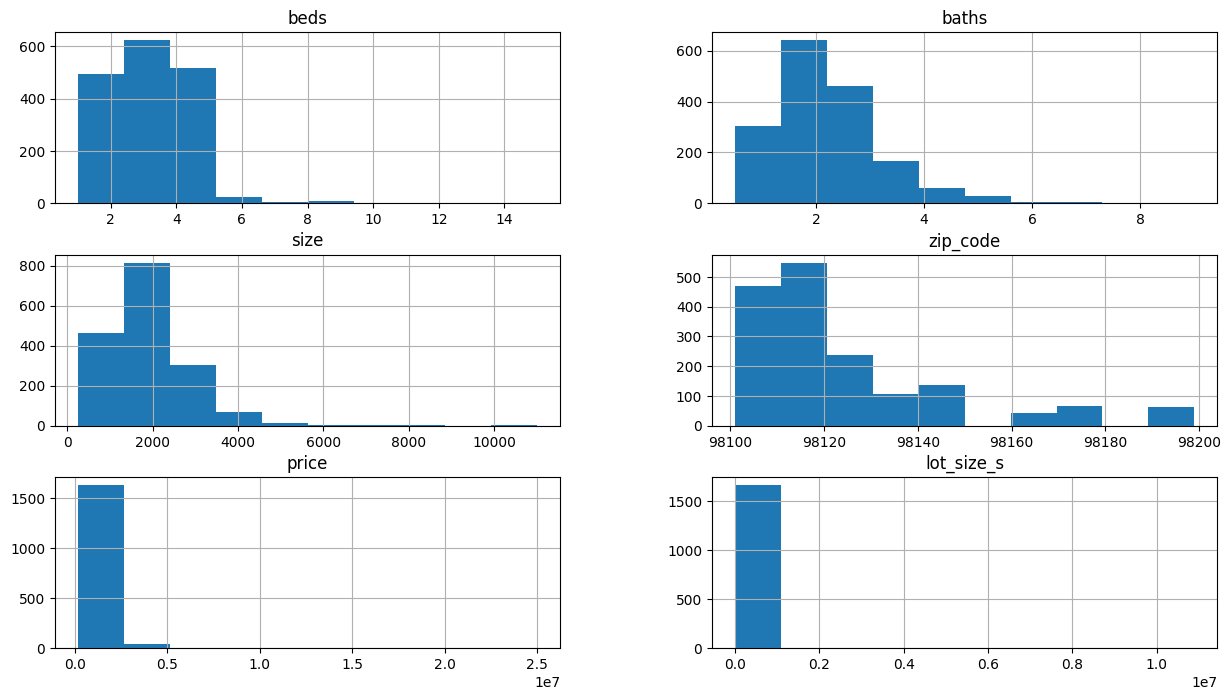

In [15]:
#histogram of the training data
train.hist(figsize=(15, 8))

<AxesSubplot: >

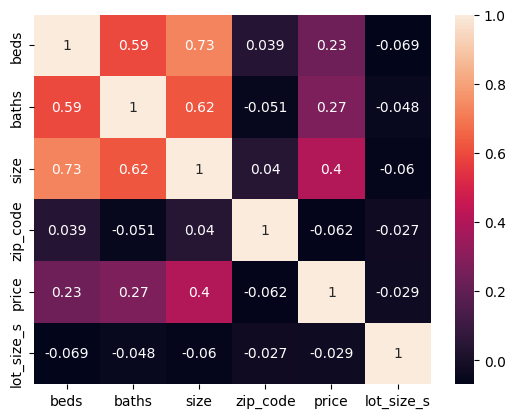

In [16]:
#heatmap of the training data
sns.heatmap(train.corr(), annot=True)

In [17]:
#drop training data which does not have a strong correlation
train=train.drop(['zip_code'], axis=1)
train=train.drop(['lot_size_s'], axis=1)


In [18]:
#drop corresponding test data
test=test.drop(['zip_code'], axis=1)
test=test.drop(['lot_size_s'], axis=1)

## Analyze 

<AxesSubplot: >

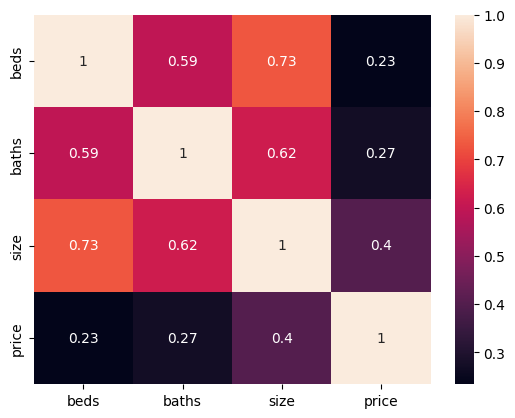

In [19]:
#Final heat map
sns.heatmap(train.corr(), annot=True)

## Regression Model

In [20]:
#linear regression usin sklearn
regr = linear_model.LinearRegression()

In [21]:
#y and y test
y = train['price']
y_test = test['price']

In [22]:
#X and X_test
features = ['beds','baths','size']
X = train[features]
X_test = test[features]

In [23]:
#fit the data
regr.fit(X,y)

LinearRegression()

## Check 

In [25]:
#get score
y_preds = regr.predict(X_test)
print('Variance score: %.2f' % regr.score(X_test,y_test))

Variance score: 0.52
